In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def generate_synthetic_data():
    print("Generating synthetic energy data...")
    # Create date range for 6 months: Jan 2023 to June 2023
    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')
    
    # Create DataFrame
    df = pd.DataFrame(date_rng, columns=['timestamp'])
    
    # Simulate device power consumption (Watts)
    
    # 1. Fridge: Cyclic pattern (Compressor On/Off) + Base load
    # Randomly switching between low (idle) and high (cooling) states
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])
    
    # 2. AC: Higher in summer (April-June), lower in winter (Jan-March)
    month = df['timestamp'].dt.month
    # Higher probability of AC being ON in months 4, 5, 6
    ac_prob = np.where(month >= 4, 0.8, 0.1) 
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)
    
    # 3. Lights: Higher usage at night (18:00 - 06:00)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)
    
    # 4. Microwave: Random usage spikes
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.95, 0.05])
    
    # Total power consumption
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']
    
    # Introduce some random missing values to practice cleaning
    # Set 0.5% of total_power to NaN
    mask = np.random.choice([True, False], size=len(df), p=[0.005, 0.995])
    df.loc[mask, 'total_power'] = np.nan
    
    return df

# Generate and save
df_raw = generate_synthetic_data()
print("Data Generated. Shape:", df_raw.shape)
df_raw.to_csv()

Generating synthetic energy data...
Data Generated. Shape: (4321, 6)


C:\Users\adhee\AppData\Local\Temp\ipykernel_8416\3277406188.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


',timestamp,fridge,ac,lights,microwave,total_power\r\n0,2023-01-01 00:00:00,60,0,45,1188,1293.0\r\n1,2023-01-01 01:00:00,185,1691,63,0,1939.0\r\n2,2023-01-01 02:00:00,90,0,81,0,171.0\r\n3,2023-01-01 03:00:00,194,0,54,0,248.0\r\n4,2023-01-01 04:00:00,66,0,98,0,164.0\r\n5,2023-01-01 05:00:00,121,0,0,0,121.0\r\n6,2023-01-01 06:00:00,0,0,88,0,88.0\r\n7,2023-01-01 07:00:00,0,0,0,0,0.0\r\n8,2023-01-01 08:00:00,96,0,73,0,169.0\r\n9,2023-01-01 09:00:00,0,2238,0,0,2238.0\r\n10,2023-01-01 10:00:00,177,0,0,0,177.0\r\n11,2023-01-01 11:00:00,84,1762,0,0,1846.0\r\n12,2023-01-01 12:00:00,0,0,0,0,0.0\r\n13,2023-01-01 13:00:00,0,0,82,0,82.0\r\n14,2023-01-01 14:00:00,0,0,0,0,0.0\r\n15,2023-01-01 15:00:00,113,0,0,0,113.0\r\n16,2023-01-01 16:00:00,172,0,0,0,172.0\r\n17,2023-01-01 17:00:00,193,0,0,0,193.0\r\n18,2023-01-01 18:00:00,0,0,66,0,66.0\r\n19,2023-01-01 19:00:00,0,1993,62,0,2055.0\r\n20,2023-01-01 20:00:00,177,0,58,0,235.0\r\n21,2023-01-01 21:00:00,120,0,60,0,180.0\r\n22,2023-01-01 22:00:00,0,0,0,0

In [4]:
df_raw.columns

Index(['timestamp', 'fridge', 'ac', 'lights', 'microwave', 'total_power'], dtype='object')

In [5]:
df_raw.to_csv("Synthetic-Data",index=True)
df_raw.iloc[:30]
df_raw

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,60,0,45,1188,1293.0
1,2023-01-01 01:00:00,185,1691,63,0,1939.0
2,2023-01-01 02:00:00,90,0,81,0,171.0
3,2023-01-01 03:00:00,194,0,54,0,248.0
4,2023-01-01 04:00:00,66,0,98,0,164.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,0,0,0,0,0.0
4317,2023-06-29 21:00:00,0,0,54,0,54.0
4318,2023-06-29 22:00:00,137,1537,76,0,1750.0
4319,2023-06-29 23:00:00,0,1422,58,0,1480.0


In [6]:
missing = df_raw.isnull().sum()
print("Missing Values per column:\n", missing)

Missing Values per column:
 timestamp       0
fridge          0
ac              0
lights          0
microwave       0
total_power    18
dtype: int64


In [7]:
df_raw[df_raw['total_power'].isna()].index

Index([ 123,  207,  218,  274,  772,  964, 1623, 2191, 2242, 2285, 2831, 2871,
       3139, 3158, 3408, 4004, 4067, 4175],
      dtype='int64')

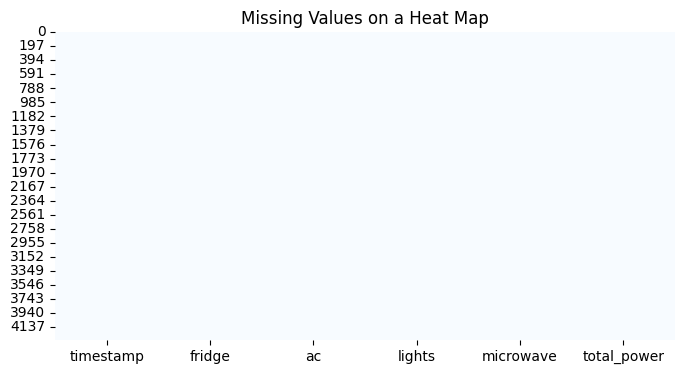

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(df_raw.isnull(),cbar=False,cmap='Blues')
plt.title("Missing Values on a Heat Map")
plt.show()

In [9]:
df_clean = df_raw.ffill()
df_clean.to_csv("Clean-Data.csv", index=False)

In [10]:
df_clean[df_clean['total_power'].isna()].index

Index([], dtype='int64')

In [11]:
print(df_clean.head())
print(df_clean.index)

            timestamp  fridge    ac  lights  microwave  total_power
0 2023-01-01 00:00:00      60     0      45       1188       1293.0
1 2023-01-01 01:00:00     185  1691      63          0       1939.0
2 2023-01-01 02:00:00      90     0      81          0        171.0
3 2023-01-01 03:00:00     194     0      54          0        248.0
4 2023-01-01 04:00:00      66     0      98          0        164.0
RangeIndex(start=0, stop=4321, step=1)


In [12]:
print(df_clean.columns)

Index(['timestamp', 'fridge', 'ac', 'lights', 'microwave', 'total_power'], dtype='object')


In [13]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [14]:
print(df_clean.index)
print(df_clean.dtypes)

RangeIndex(start=0, stop=4321, step=1)
timestamp      datetime64[ns]
fridge                  int64
ac                      int32
lights                  int32
microwave               int64
total_power           float64
dtype: object


In [15]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], errors='coerce')
df_clean = df_clean.dropna(subset=['timestamp'])
df_clean = df_clean.set_index('timestamp')
df_clean = df_clean.sort_index()

In [16]:
df_daily = df_clean.resample('D').mean()
df_weekly_sum = df_clean.resample('W').sum()
print("Daily resampled Shape:", df_daily.shape)
print("Weekly resampled Shape:", df_weekly_sum.shape)

Daily resampled Shape: (181, 5)
Weekly resampled Shape: (27, 5)


In [17]:
df = pd.read_csv('Clean-Data')
df

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,0,0,28,0,28.0
1,2023-01-01 01:00:00,119,0,84,0,203.0
2,2023-01-01 02:00:00,135,0,47,0,182.0
3,2023-01-01 03:00:00,171,0,21,0,192.0
4,2023-01-01 04:00:00,0,0,88,0,88.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,146,2221,23,0,2390.0
4317,2023-06-29 21:00:00,72,1887,31,0,1990.0
4318,2023-06-29 22:00:00,156,1982,0,0,2138.0
4319,2023-06-29 23:00:00,149,1143,43,0,1335.0


In [18]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df['timestamp']

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
4316   2023-06-29 20:00:00
4317   2023-06-29 21:00:00
4318   2023-06-29 22:00:00
4319   2023-06-29 23:00:00
4320   2023-06-30 00:00:00
Name: timestamp, Length: 4321, dtype: datetime64[ns]

In [19]:
df_daily.to_csv('timed-data',index=True)
df_daily.head()

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,82.250000,320.166667,38.666667,49.500000,490.583333
2023-01-02,76.750000,189.708333,26.666667,85.708333,378.833333
2023-01-03,76.458333,224.291667,33.208333,0.000000,333.958333
2023-01-04,88.583333,86.166667,30.458333,0.000000,205.208333
2023-01-05,81.708333,112.541667,39.333333,0.000000,233.583333


In [20]:
df_weekly_sum

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,1974,7684,928,1188,11774.0
2023-01-08,13525,28970,5184,4179,51895.0
2023-01-15,13224,28143,5430,8764,57053.0
2023-01-22,14363,25828,4984,6276,51451.0
2023-01-29,14216,46082,5836,6627,72761.0
2023-02-05,14752,26005,5571,7930,54358.0
2023-02-12,13306,21637,4743,6032,45635.0
2023-02-19,14910,39839,5228,6466,66443.0
2023-02-26,14228,33371,5493,1896,54988.0


In [21]:
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

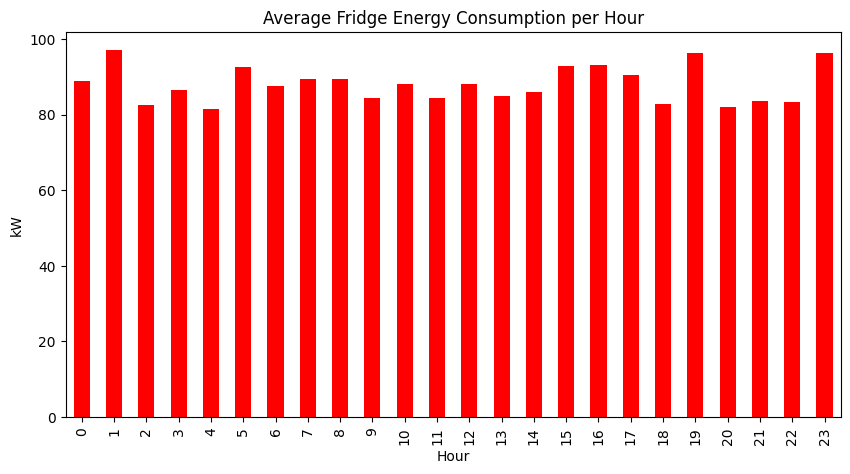

In [22]:
hourly_stats = df.groupby('hour')['fridge'].mean()
plt.figure(figsize=(10,5))
hourly_stats.plot(kind='bar', color='red')
plt.title("Average Fridge Energy Consumption per Hour")
plt.xlabel("Hour")
plt.ylabel("kW")
plt.show()

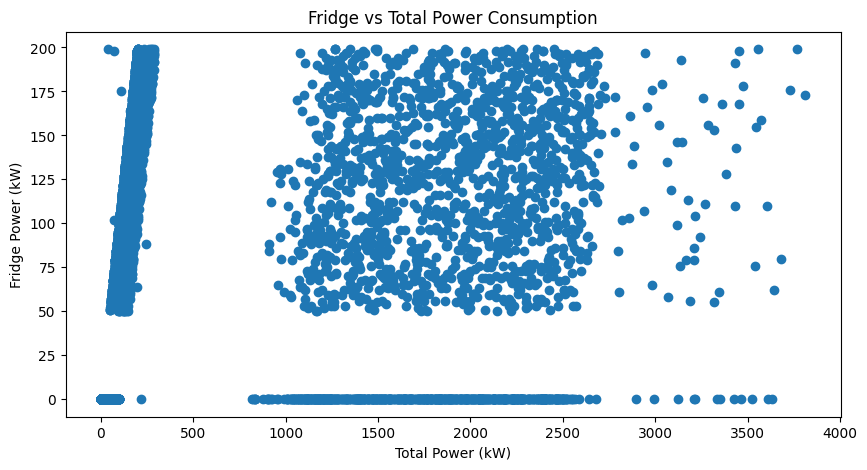

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(df['total_power'], df['fridge'])
plt.title("Fridge vs Total Power Consumption")
plt.xlabel("Total Power (kW)")
plt.ylabel("Fridge Power (kW)")
plt.show()

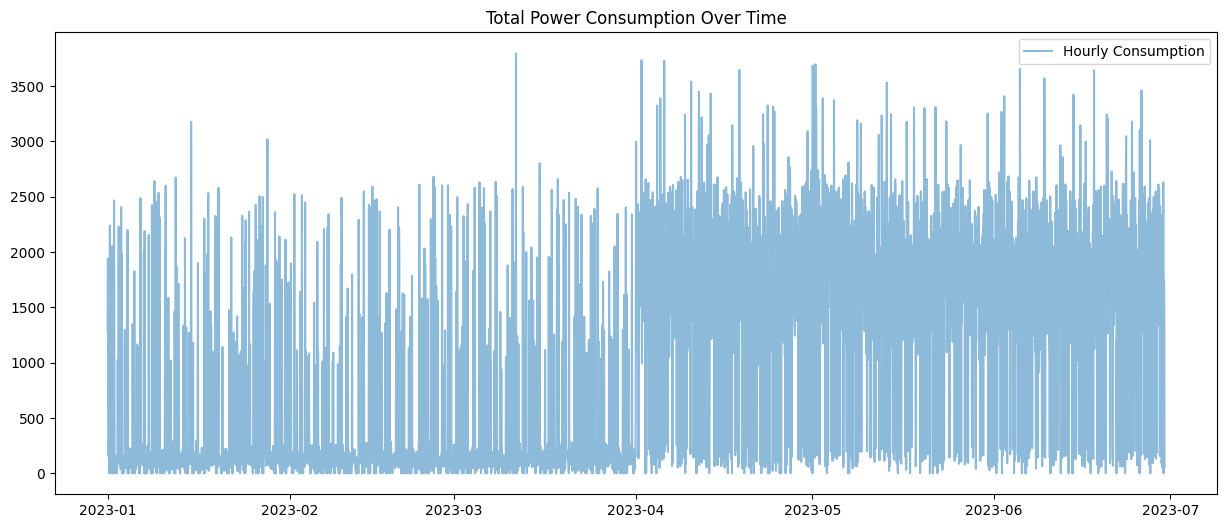

In [24]:
plt.figure(figsize=(15,6))
plt.plot(df_clean.index, df_clean['total_power'], label='Hourly Consumption',alpha=0.5)
plt.title("Total Power Consumption Over Time")
plt.legend()
plt.show()

In [25]:
avg_consumption = df_clean[['fridge', 'ac', 'microwave','lights']].mean()
avg_consumption

fridge        87.499653
ac           796.668364
microwave     52.687109
lights        31.404999
dtype: float64

C:\Users\adhee\AppData\Local\Temp\ipykernel_8416\3014722625.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


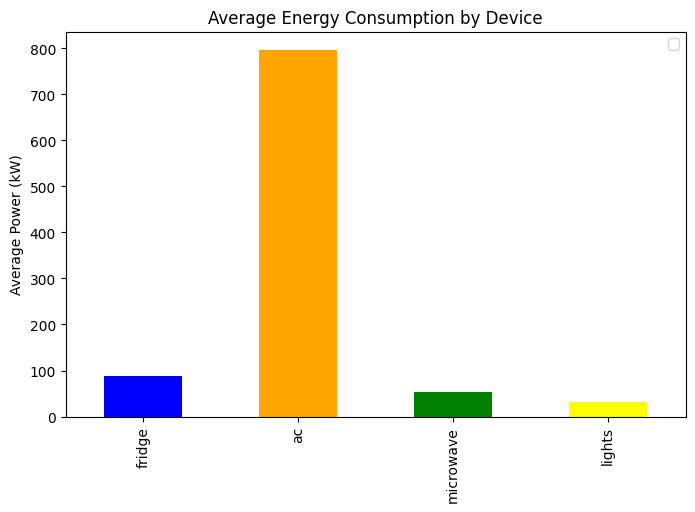

In [26]:
plt.figure(figsize=(8,5))
avg_consumption.plot(kind='bar', color=['blue', 'orange', 'green','yellow'])
plt.title("Average Energy Consumption by Device")
plt.ylabel("Average Power (kW)")
plt.legend()
plt.show()

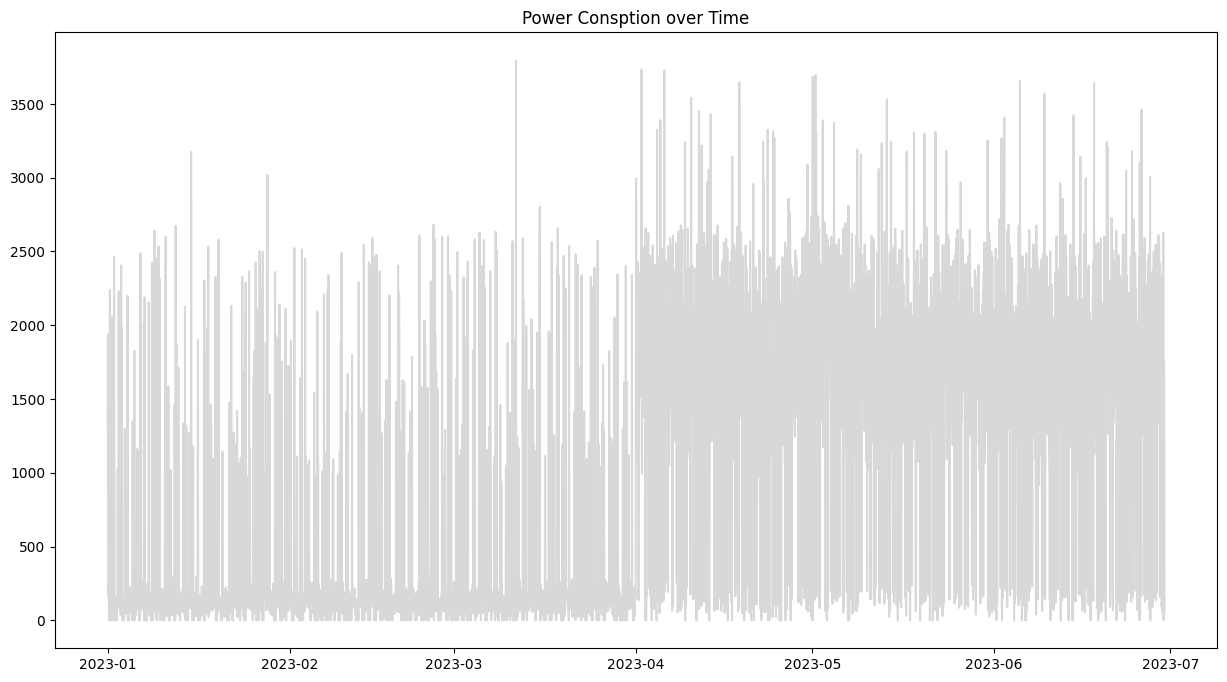

In [27]:
plt.figure(figsize=(15,8))
plt.plot(df_clean.index, df_clean['total_power'],alpha=0.3,color = "gray", label = "Power Consumption Hourly") 
plt.title("Power Consption over Time")
plt.show()

In [28]:
print(df.columns)

Index(['timestamp', 'fridge', 'ac', 'lights', 'microwave', 'total_power',
       'hour'],
      dtype='object')


In [29]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [30]:
df_monthly_kWh = df[['fridge','ac','lights','microwave']].resample('ME').sum()

<Figure size 1200x600 with 0 Axes>

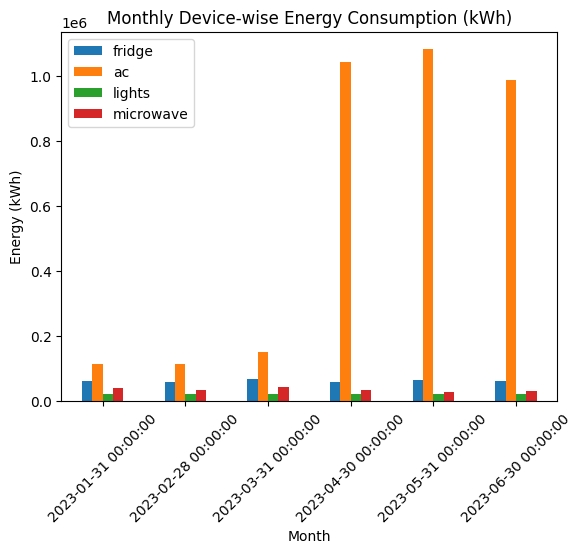

In [31]:
plt.figure(figsize=(12,6))
df_monthly_kWh.plot(kind='bar')

plt.title("Monthly Device-wise Energy Consumption (kWh)")
plt.xlabel("Month")
plt.ylabel("Energy (kWh)")
plt.xticks(rotation=45)
plt.show()

In [32]:
df_clean.columns

Index(['fridge', 'ac', 'lights', 'microwave', 'total_power'], dtype='object')

In [33]:
df = pd.read_csv('HomeC.csv')
df

C:\Users\adhee\AppData\Local\Temp\ipykernel_8416\1728068120.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('HomeC.csv')


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [34]:
df.columns = [col.replace('[kW]', '').strip() for col in df.columns]
print("CLeaned Column Names: ", df.columns.tolist())
df.columns

CLeaned Column Names:  ['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1', 'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']


Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [35]:
kitchen_cols = ['Dishwasher','Microwave','Fridge','Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]']
available_cols = [c for c in kitchen_cols if c in df.columns]
df_kitchen = df[available_cols]
df_kitchen.sum()
df_kitchen
df_kitchen.notnull()

,Dishwasher,Microwave,Fridge
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
503906,True,True,True
503907,True,True,True
503908,True,True,True
503909,True,True,True


In [36]:
df['Total_Kitchen_Power'] = df[available_cols].sum(axis=1)
df['High_Useage'] = df['Total_Kitchen_Power'] <1.0
df[['Total_Kitchen_Power','High_Useage']].sample(50)

,Total_Kitchen_Power,High_Useage
372450,0.009550,True
272562,0.179433,True
367719,0.008933,True
458992,0.007950,True
53693,0.009650,True
270954,0.009133,True
310305,0.008800,True
53490,0.009067,True
456542,0.008733,True
72225,0.009300,True


In [37]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['time']

0        1970-01-01 00:00:01.451624400
1        1970-01-01 00:00:01.451624401
2        1970-01-01 00:00:01.451624402
3        1970-01-01 00:00:01.451624403
4        1970-01-01 00:00:01.451624404
                      ...             
503906                             NaT
503907                             NaT
503908                             NaT
503909                             NaT
503910                             NaT
Name: time, Length: 503911, dtype: datetime64[ns]

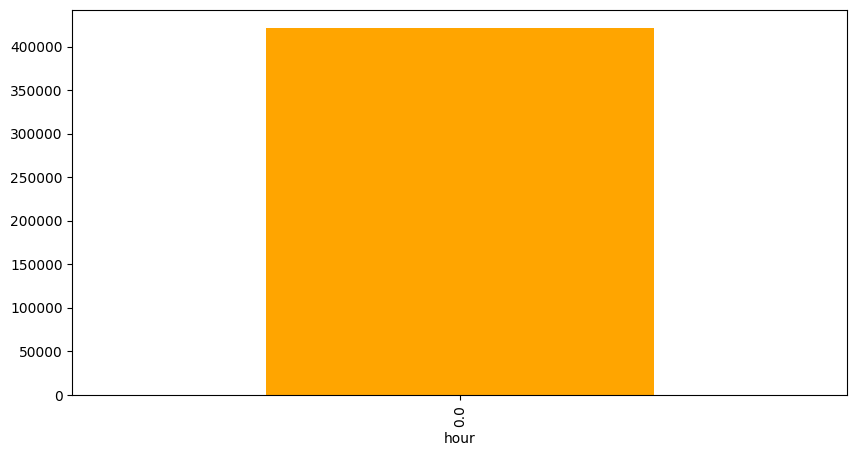

In [38]:
df['hour'] = df['time'].dt.hour
#  hourly mean of use
hourly_status = df.groupby('hour')['use'].sum()
plt.figure(figsize = (10,5))
hourly_status.plot(kind = 'bar', color='orange')
plt.show()